In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
df.sum().isnull()

Unnamed: 0          False
Company             False
TypeName            False
Inches              False
ScreenResolution    False
Cpu                 False
Ram                 False
Memory              False
Gpu                 False
OpSys               False
Weight              False
Price               False
dtype: bool

In [8]:
df['Company'].value_counts().sum()

1303

In [9]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
## Drop Unnamed: 0
df = df.drop('Unnamed: 0', axis=1)

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [13]:
### Checking for duplicated rows 
df.duplicated().sum()

29

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [15]:
obj = df.select_dtypes(include=['object']).columns
num = df.select_dtypes(include=['int32','int64','float32','float64']).columns

In [16]:
print(obj)
print(num)

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object')
Index(['Inches', 'Price'], dtype='object')


In [17]:
def unique_val(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')

def value_counts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')

for col in df.columns:
    unique_val(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [19]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [20]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

# Converting from string to integer for RAM column
df['Ram'] = df['Ram'].astype('int32')

# Converting from string to float for the Weight column
df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


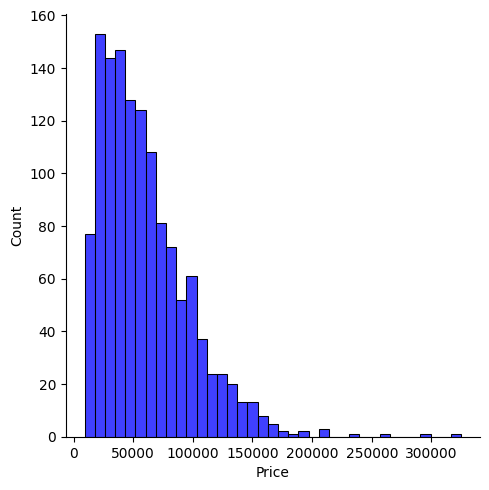

In [21]:
### Exploratory Data Analysis

# Viewing the distribution of the price column
sns.displot(df['Price'], color='blue')

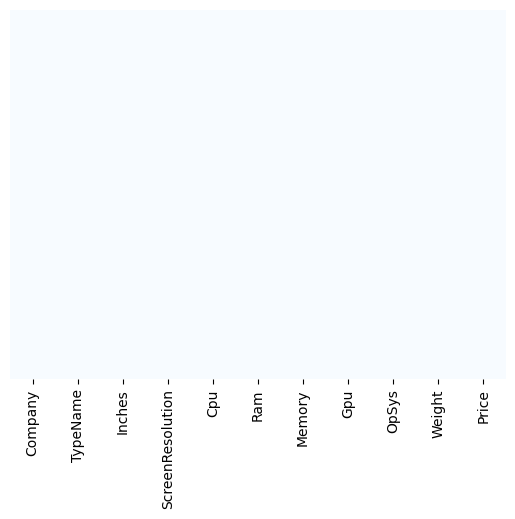

In [22]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

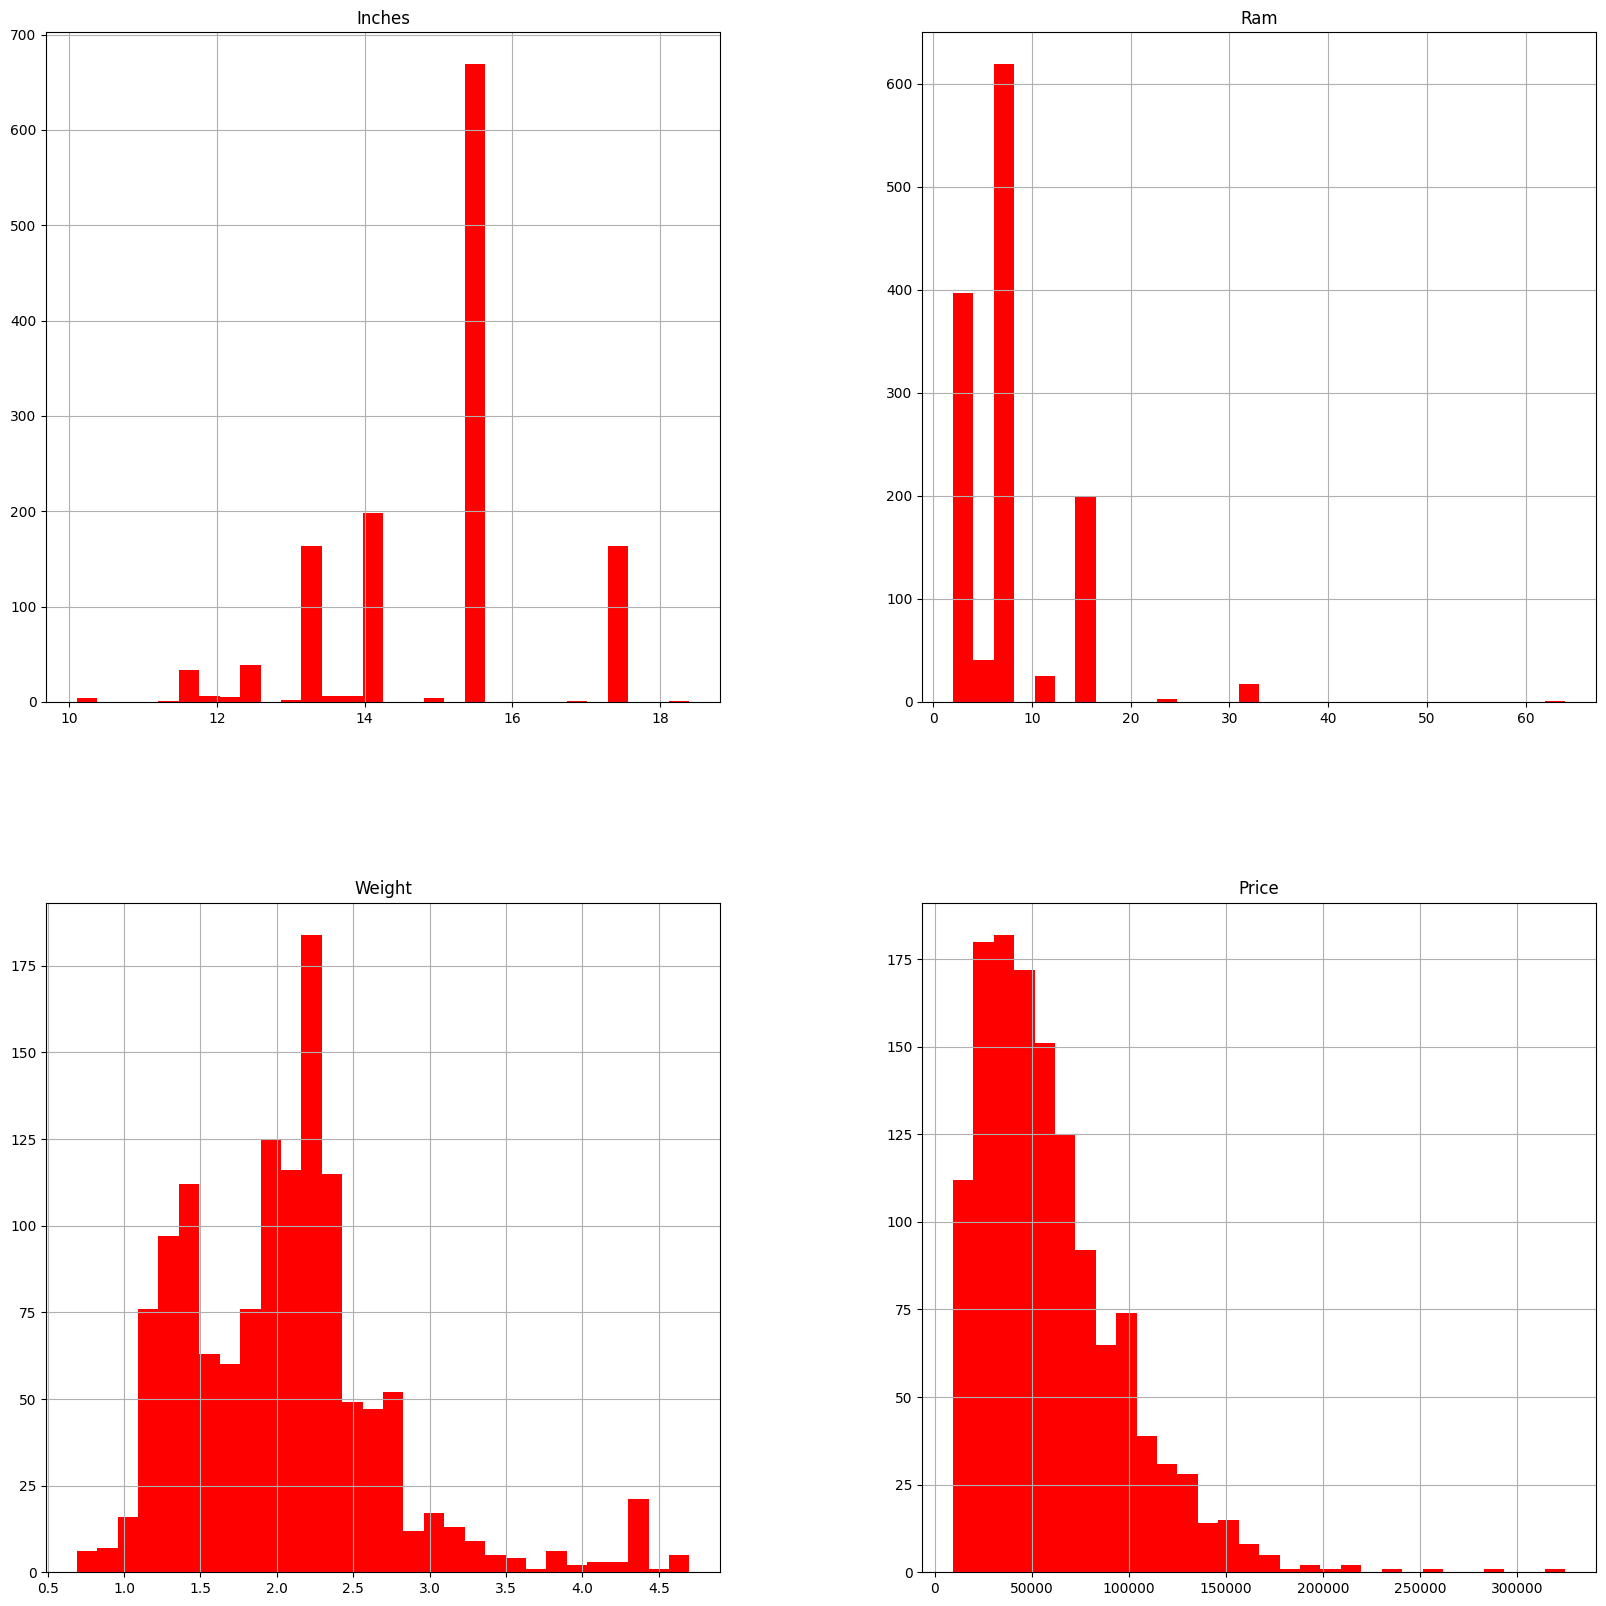

In [23]:
# Plotting countplots for the variables (num variables)
df.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()

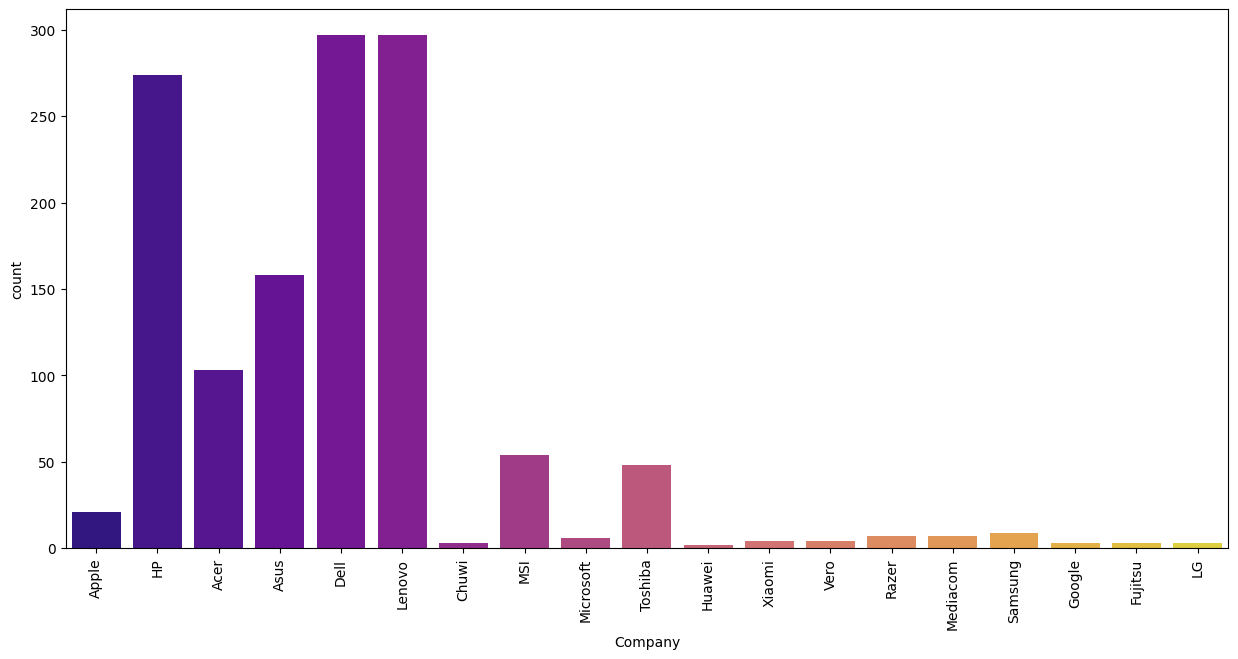

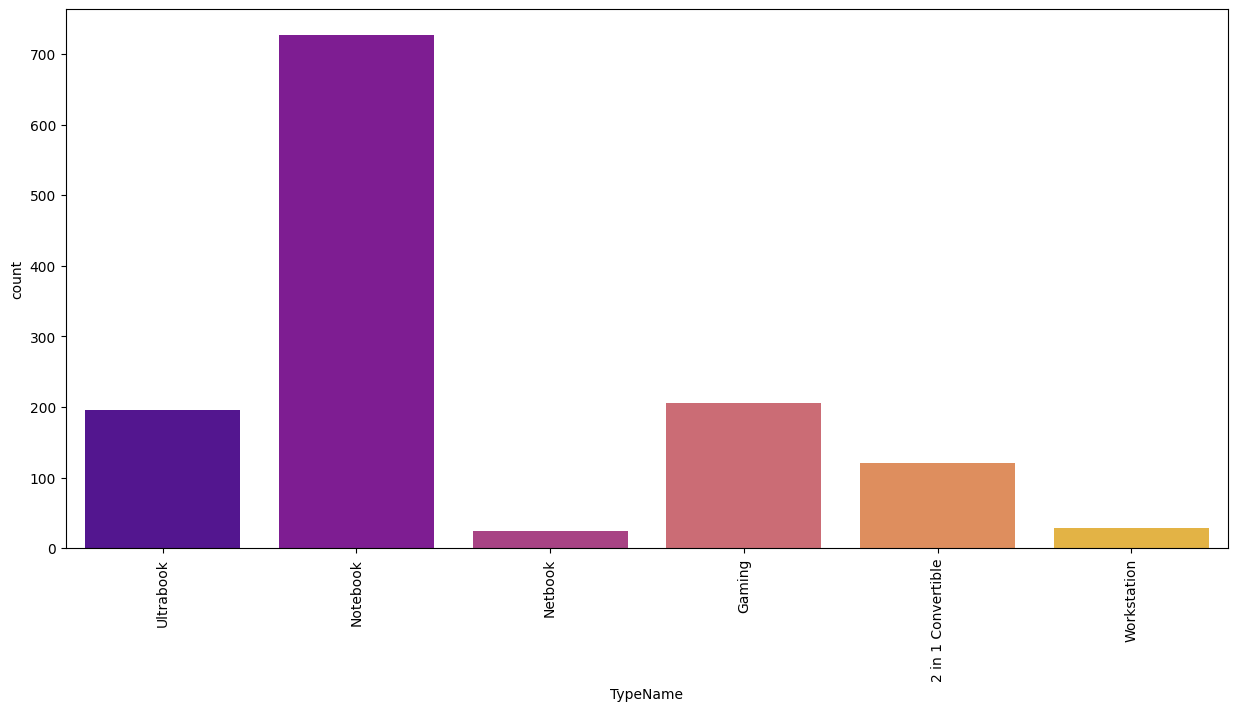

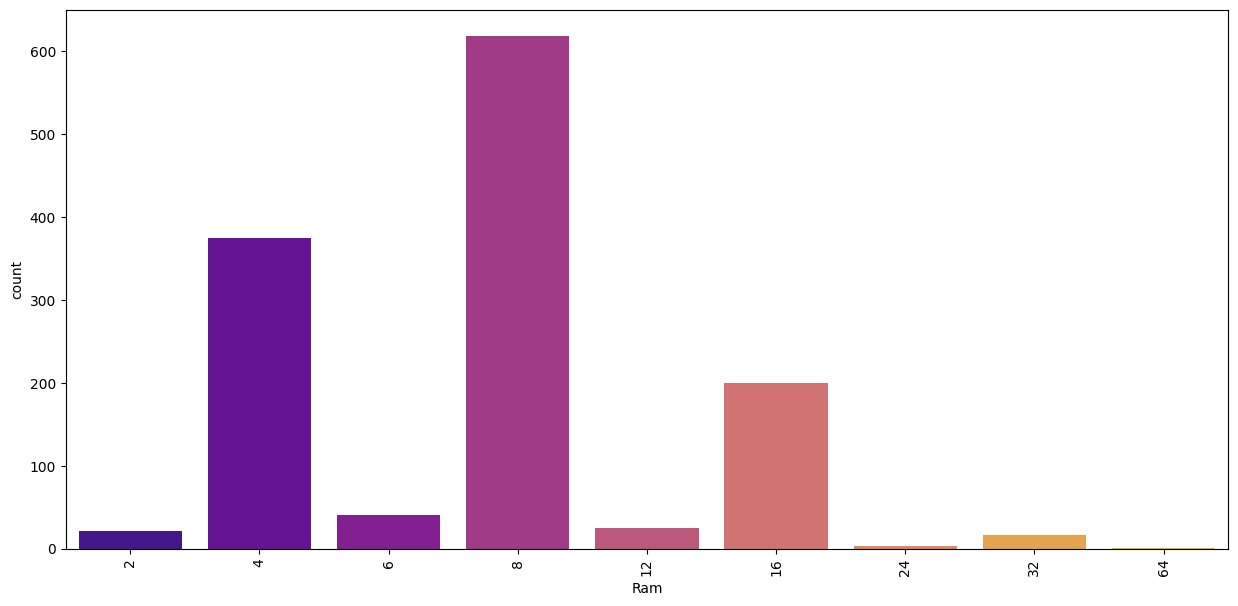

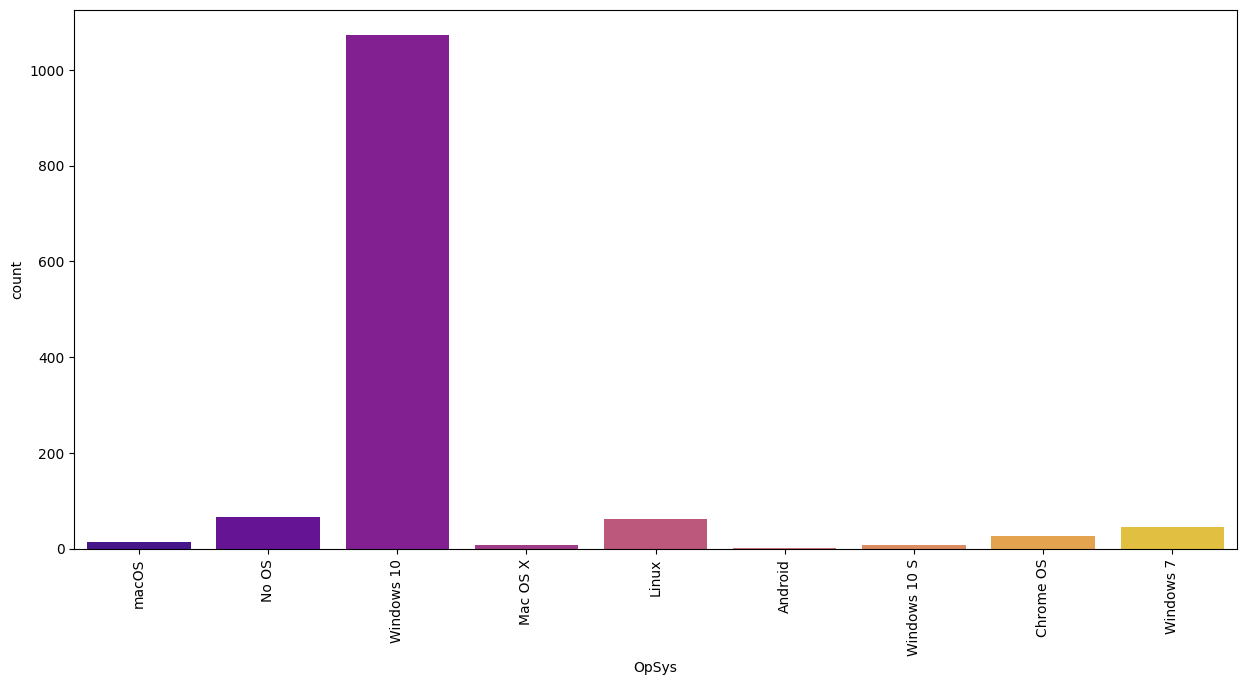

In [24]:
# Plotting countplots for the categorical variables
import matplotlib.pyplot as plt
import seaborn as sns

def drawplot(col):
    plt.figure(figsize=(15, 7))
    sns.countplot(x=df[col], palette='plasma')
    plt.xticks(rotation='vertical')
    plt.show()

toview = ['Company', 'TypeName', 'Ram', 'OpSys']
for col in toview:
    drawplot(col)

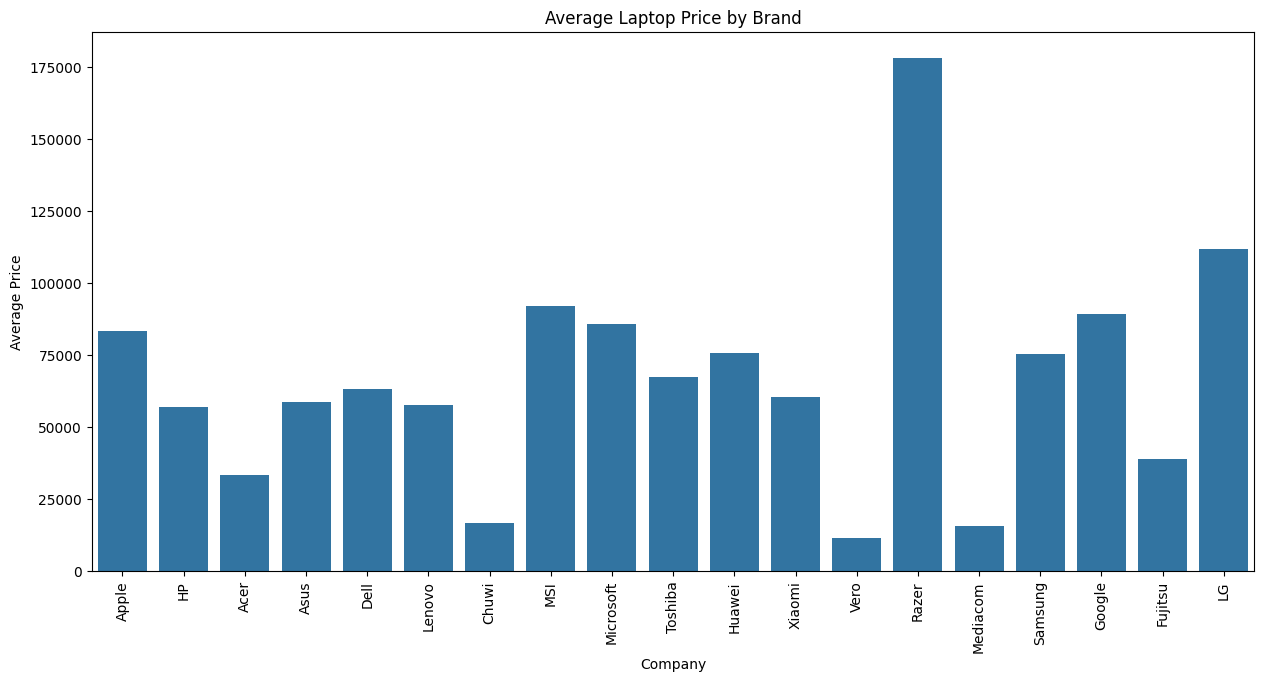

In [25]:
# Average price for each of the laptop brands
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.barplot(x=df['Company'], y=df['Price'], estimator='mean', ci=None)
plt.xticks(rotation='vertical')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.title('Average Laptop Price by Brand')
plt.show()

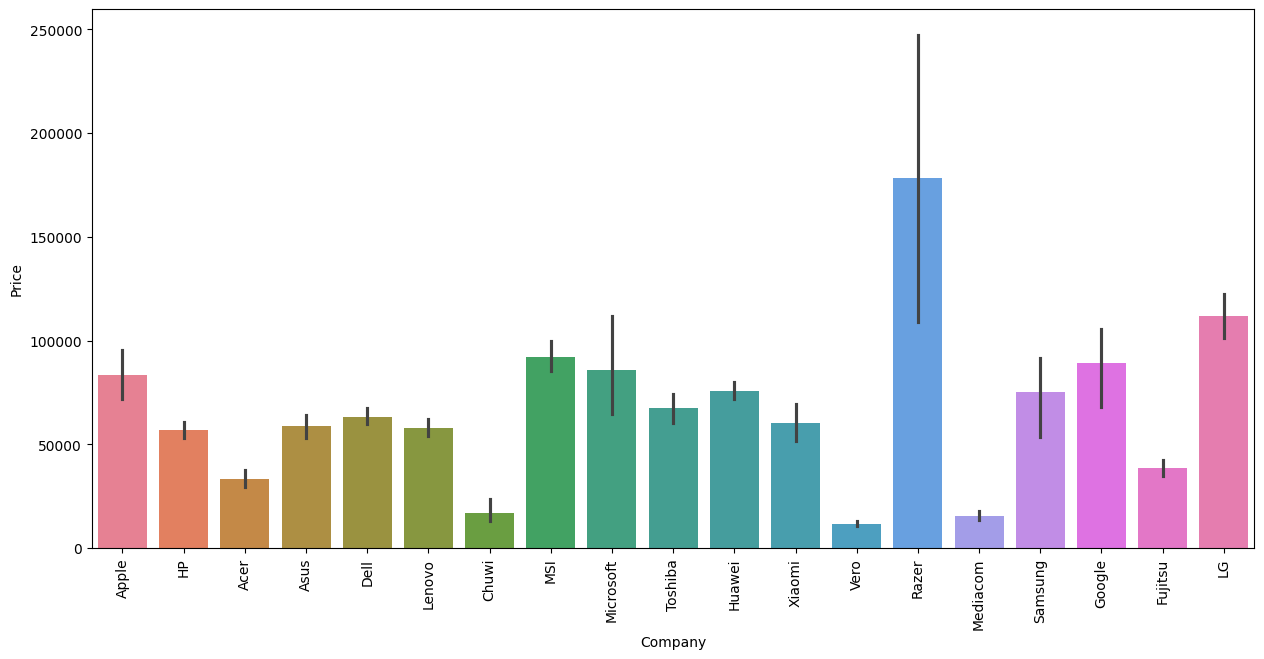

In [26]:
plt.figure(figsize=(15,7))
sns.barplot(x = df['Company'], y = df['Price'], hue=df['Company'])
plt.xticks(rotation = 'vertical')
plt.show()

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800')])

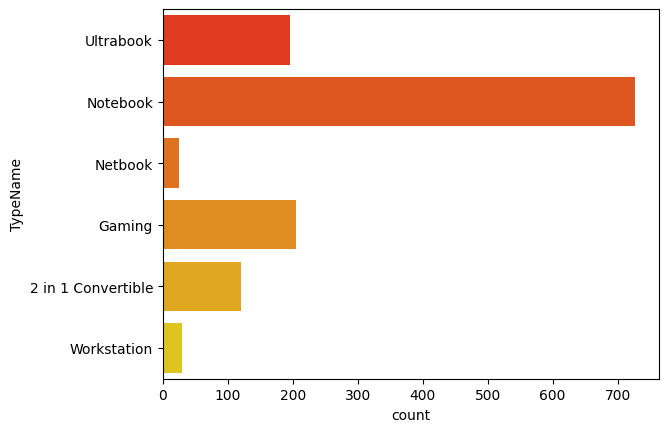

In [27]:
## Various types of laptops

sns.countplot(df['TypeName'], palette='autumn')
plt.xticks(rotation='horizontal')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

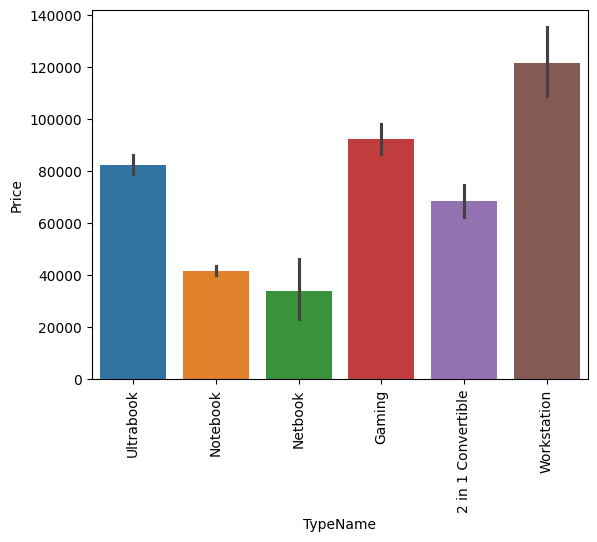

In [28]:
## Laptop type and variation about the price

sns.barplot(x=df['TypeName'], y=df['Price'], hue=df['TypeName'])
plt.xticks(rotation='vertical')

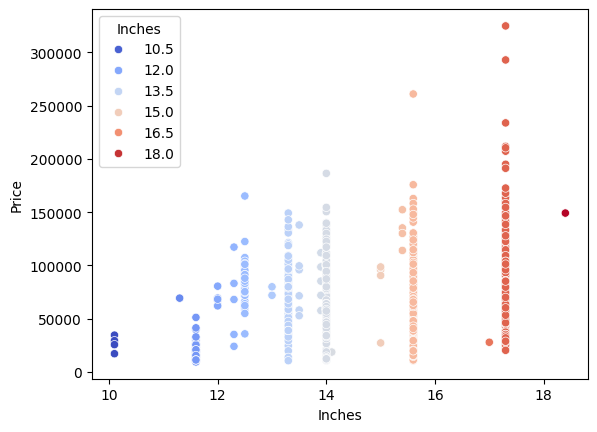

In [29]:
### Variation of inches towards the price 

sns.scatterplot(x=df['Inches'], y=df['Price'], hue=df['Inches'], palette='coolwarm')
plt.show()

In [30]:
# Creating a new col, 'TouchScreen' if the value is 1 that laptop is touch screen

df['TouchScreen'] = [1 if 'Touchscreen' in x else 0 for x in df['ScreenResolution']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [31]:
df['TouchScreen'].unique()

array([0, 1], dtype=int64)

In [32]:
len(df['TouchScreen'] == 1)

1303

In [33]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0


<Axes: ylabel='count'>

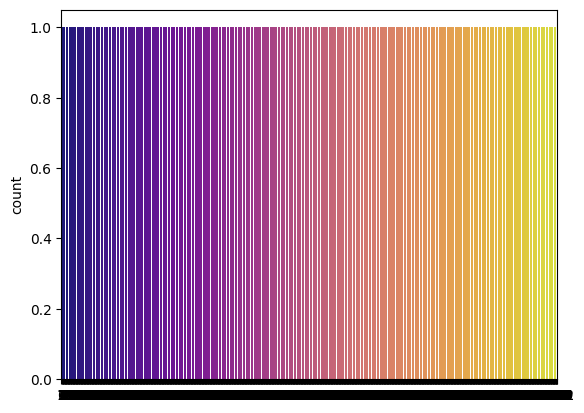

In [34]:
sns.countplot(df['TouchScreen'], palette='plasma')

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

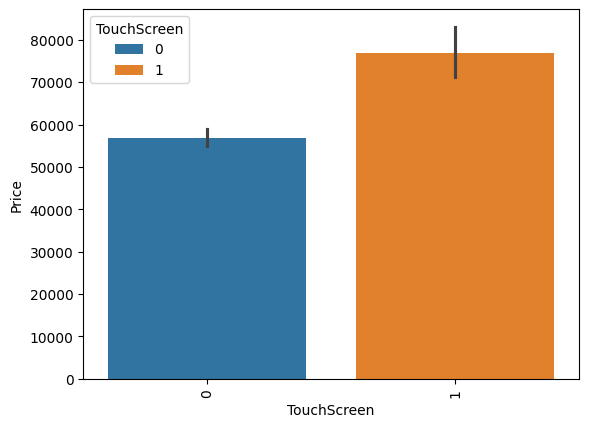

In [35]:
# TouchScreen on comparision with price of laptop
sns.barplot(x=df['TouchScreen'], y=df['Price'], hue=df['TouchScreen'])
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

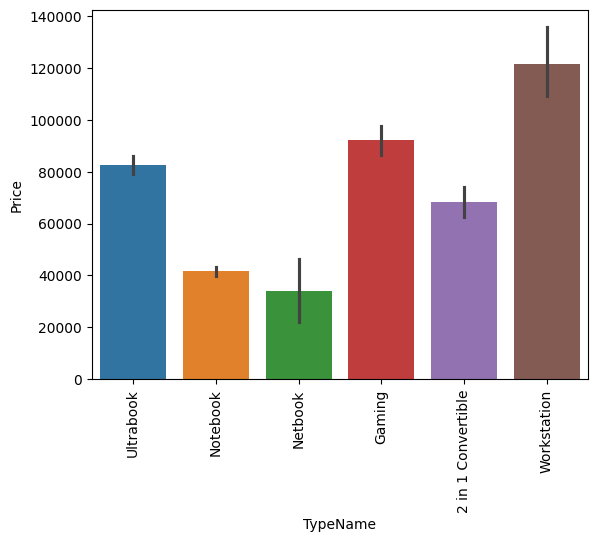

In [36]:
# Laptop type and variation about the price 
sns.barplot(x=df['TypeName'], y=df['Price'], hue=df['TypeName'])
plt.xticks(rotation='vertical')

In [37]:
# Creating a new col named IPS, does the laptop have IPS facility or not 

df['IPS'] = [1 if 'IPS' in x else 0 for x in df['ScreenResolution']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

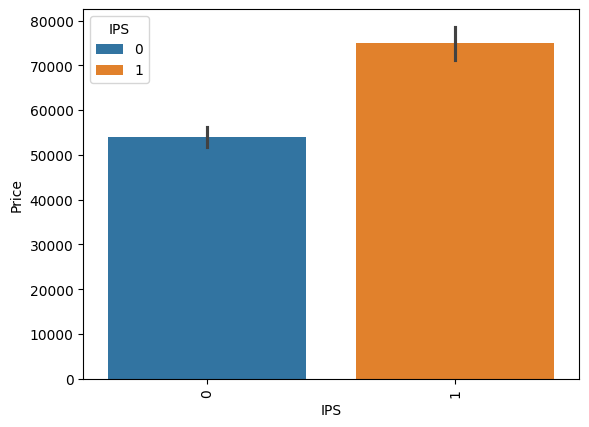

In [38]:
# TouchScreen on comparision with price of laptop
sns.barplot(x=df['IPS'], y=df['Price'], hue=df['IPS'])
plt.xticks(rotation='vertical')

<Axes: ylabel='count'>

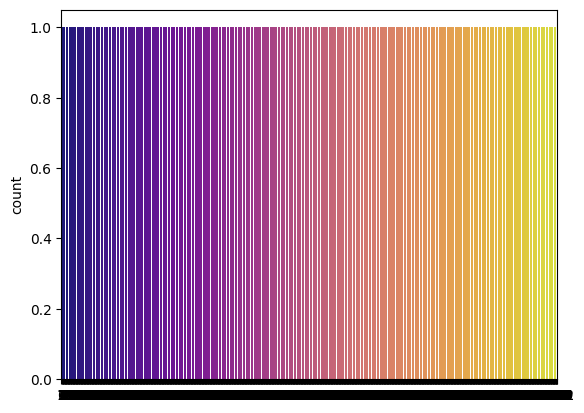

In [39]:
sns.countplot(df['IPS'], palette='plasma')

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [41]:
split_df = df['ScreenResolution'].str.split('x', n=1, expand=True)
split_df.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [42]:
split_df = df['ScreenResolution'].str.split('x', n=1, expand=True)

df['X_res'] = split_df[0]
df['Y_res'] = split_df[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [43]:
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [44]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


<Axes: >

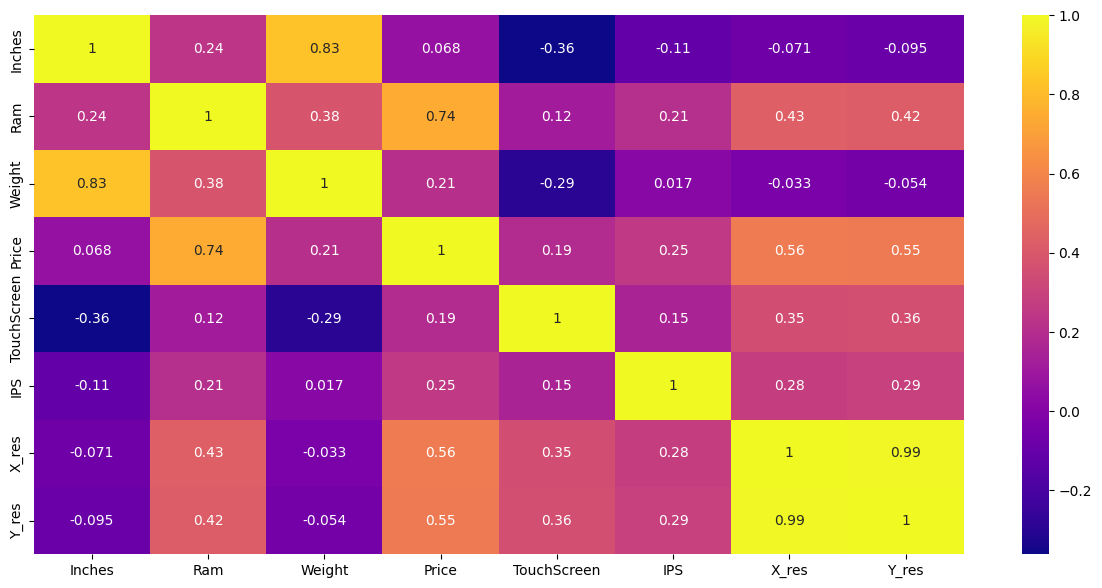

In [45]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='plasma')

In [46]:
df.select_dtypes(include='number').corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [47]:
# Create a new PPI (Pixels Per Inch) column by combining X_res, Y_res and Inches
# Formula: PPI = square root of (X_res² + Y_res²) divided by Inches

df['PPI'] = (np.sqrt(df['X_res']**2 + df['Y_res']**2) / df['Inches'])
df['PPI'] = df['PPI'].round(2) 

In [48]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.98
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.68
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.21
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.53
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.98


In [49]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [50]:
# Extract the first 3 words from the 'CPU' column to create a simplified 'CPU_name' column
df['CPU_name'] = df['Cpu'].apply(lambda text: " ".join(text.split()[:3]))
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.98,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.68,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.21,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.53,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.98,Intel Core i5


In [51]:
def processortype(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

df['CPU_name'] = df['CPU_name'].apply(lambda text: processortype(text))
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.98,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.68,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.21,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.53,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.98,Intel Core i5


(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

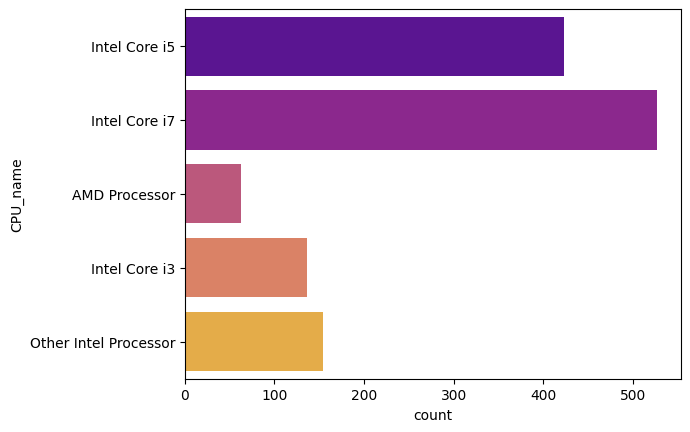

In [52]:
sns.countplot(df['CPU_name'], palette='plasma')
plt.xticks(rotation='horizontal')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

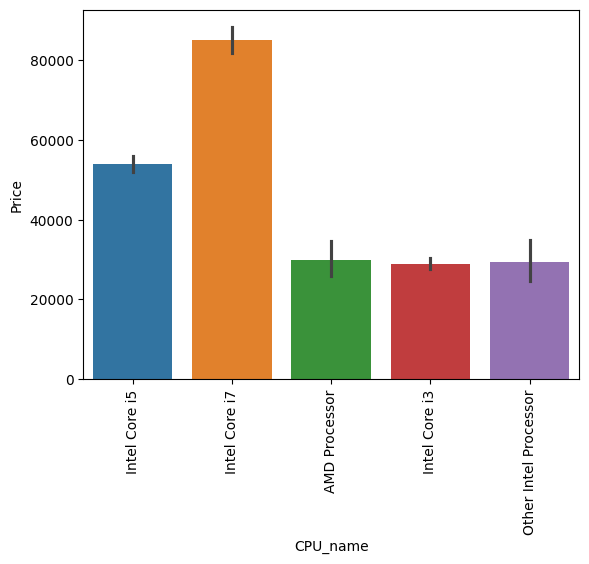

In [53]:
## Price and processor variation

sns.barplot(x=df['CPU_name'], y=df['Price'], hue=df['CPU_name'])
plt.xticks(rotation='vertical')

In [54]:
## Drop df['Cpu']
df = df.drop('Cpu', axis=1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.98,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.68,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.21,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.53,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.98,Intel Core i5


In [55]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.98,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.68,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.21,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.53,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.98,Intel Core i5


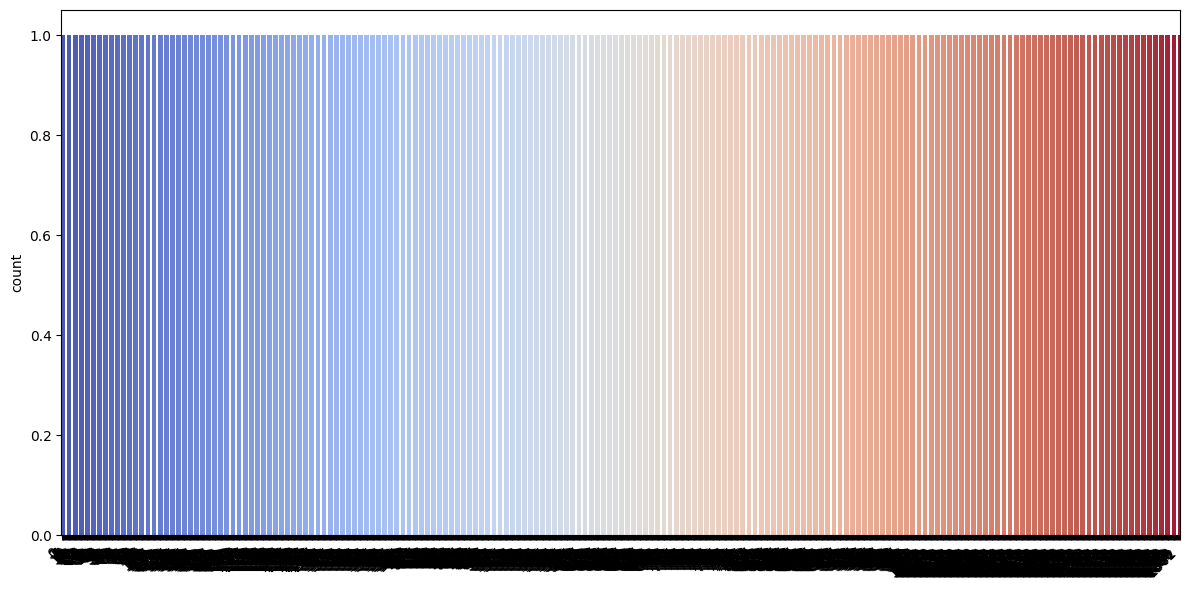

In [56]:
## Analysis on the RAM column
plt.figure(figsize=(12, 6))
sns.countplot(df['Ram'], palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [57]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [58]:
## 4 most common variants observed : HHD,SSD,Flash,Hybrid

# this expression will remove the decimal space for example 1.0 TB will be 1TB
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

# replace the GB word with " "
df['Memory'] = df['Memory'].str.replace('GB','')

# replace the TB word with "000"
df['Memory'] = df['Memory'].str.replace('TB','000')

# split the word accross the "+" character
newdf = df['Memory'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [59]:
# Strip up all the white spaces, basically eliminating white space
df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,first
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.98,Intel Core i5,128 SSD
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.68,Intel Core i5,128 Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.21,Intel Core i5,256 SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.53,Intel Core i7,512 SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.98,Intel Core i5,256 SSD


In [60]:
for value in ['HDD', 'SSD', 'Hybrid', 'FlashStorage']:
    df[f'Layer1_{value}'] = df['first'].str.contains(value).astype(int)

In [61]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,...,IPS,X_res,Y_res,PPI,CPU_name,first,Layer1_HDD,Layer1_SSD,Layer1_Hybrid,Layer1_FlashStorage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,1,2560,1600,226.98,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,0,1440,900,127.68,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,1920,1080,141.21,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,1,2880,1800,220.53,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,1,2560,1600,226.98,Intel Core i5,256 SSD,0,1,0,0


In [62]:
## Remove all the characters just keep the numbers

df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

first
256 SSD              500
1000 HDD             225
128 SSD              172
512 SSD              138
500 HDD              132
32 Flash Storage      38
64 Flash Storage      16
2000 HDD              16
1000 SSD              16
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
240 SSD                1
8 SSD                  1
64 SSD                 1
128 HDD                1
32 HDD                 1
508 Hybrid             1
Name: count, dtype: int64

In [63]:
df['Second'] = newdf[1]
df.head()
df = df.drop('Second', axis=1)

In [64]:
import re

def extract_capacity_and_storage(x):
    x = str(x)
    capacity = re.sub(r'[^\d]', '', x)
    storage_type = re.sub(r'[\d\s]', '', x).strip()
    return int(capacity) if capacity else 0, storage_type

df[['Capacity', 'Storage_Type']] = df['Memory'].apply(lambda x: pd.Series(extract_capacity_and_storage(x)))

storage_types = ['HDD', 'SSD', 'Hybrid', 'FlashStorage']

for st in storage_types:
    df[f"Layer1_{st}"] = (df['Storage_Type'].str.contains(st, case=False, na=False)).astype(int)
    df[st] = df['Capacity'] * df[f"Layer1_{st}"]

cols_to_drop = ['Memory', 'Storage_Type'] + [f"Layer1_{st}" for st in storage_types]
df.drop(columns=cols_to_drop, inplace=True)

print(df.head())


  Company   TypeName  Inches                    ScreenResolution  Ram  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600    8   
1   Apple  Ultrabook    13.3                            1440x900    8   
2      HP   Notebook    15.6                   Full HD 1920x1080    8   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   16   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600    8   

                            Gpu  OpSys  Weight        Price  TouchScreen  ...  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0  ...   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0  ...   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0  ...   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0  ...   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0  ...   

   X_res  Y_res     PPI       CPU_name              first Capacity  HDD  S

In [65]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,TouchScreen,...,X_res,Y_res,PPI,CPU_name,first,Capacity,HDD,SSD,Hybrid,FlashStorage
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,...,1920,1080,157.35,Intel Core i7,128 SSD,128,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,...,3200,1800,276.05,Intel Core i7,512 SSD,512,0,512,0,0
1300,Lenovo,Notebook,14.0,1366x768,2,Intel HD Graphics,Windows 10,1.50,12201.12,0,...,1366,768,111.94,Other Intel Processor,64 Flash Storage,64,0,0,0,64
1301,HP,Notebook,15.6,1366x768,6,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0,...,1366,768,100.45,Intel Core i7,1000 HDD,1000,1000,0,0,0
1302,Asus,Notebook,15.6,1366x768,4,Intel HD Graphics,Windows 10,2.20,19660.32,0,...,1366,768,100.45,Other Intel Processor,500 HDD,500,500,0,0,0


In [66]:
df.select_dtypes(include='number').corr()

,Inches,Ram,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,Capacity,HDD,SSD,Hybrid,FlashStorage
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404,-0.414793,0.361818,0.356049,0.371705,0.059569,0.010936
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.433121,0.424437,0.303779,0.474877,0.456946,0.499503,0.133790,-0.002186
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846,-0.323223,0.521329,0.504212,0.539756,0.143226,0.007661
Price,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809,0.473506,0.366430,0.352995,0.385285,0.103935,0.034407
TouchScreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930,0.460582,-0.112728,-0.112107,-0.113357,-0.015481,-0.011552
IPS,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030,0.300888,0.097330,0.089108,0.106291,0.059597,-0.017167
X_res,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219,0.931220,0.178576,0.179978,0.184913,0.001896,0.001385
Y_res,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000,0.939367,0.168398,0.169829,0.174516,0.001198,0.000921
PPI,-0.414793,0.303779,-0.323223,0.473506,0.460582,0.300888,0.931220,0.939367,1.000000,0.026199,0.029017,0.028388,-0.016656,-0.003355
Capacity,0.361818,0.474877,0.521329,0.366430,-0.112728,0.097330,0.178576,0.168398,0.026199,1.000000,0.987252,0.961155,0.144708,0.007774


<Axes: >

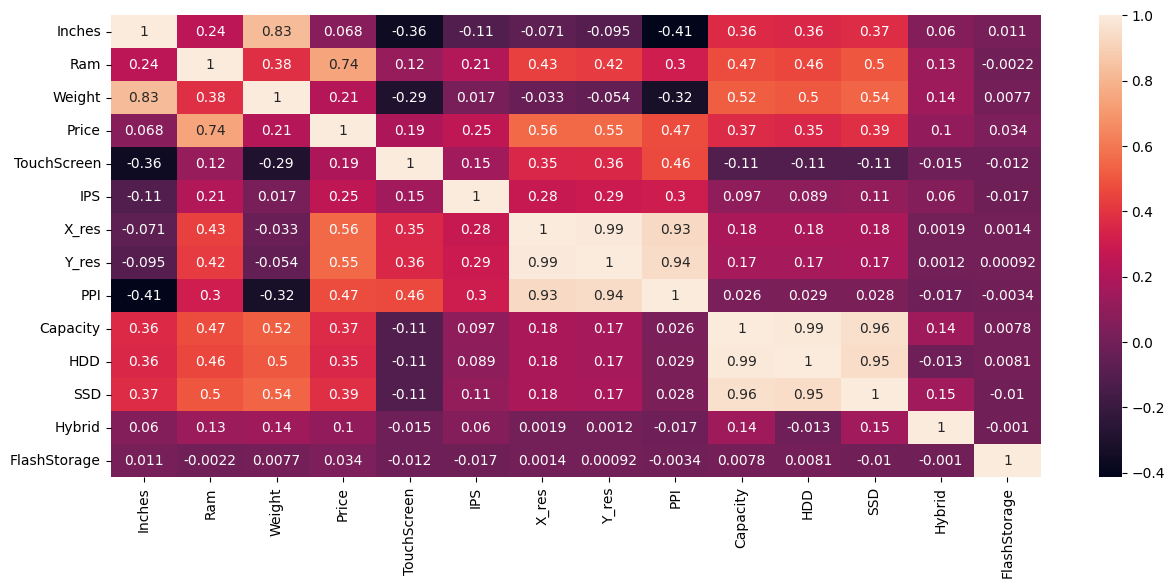

In [67]:
plt.figure(figsize=(15,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [68]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,TouchScreen,...,X_res,Y_res,PPI,CPU_name,first,Capacity,HDD,SSD,Hybrid,FlashStorage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,2560,1600,226.98,Intel Core i5,128 SSD,128,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,1440,900,127.68,Intel Core i5,128 Flash Storage,128,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,1920,1080,141.21,Intel Core i5,256 SSD,256,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,2880,1800,220.53,Intel Core i7,512 SSD,512,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,2560,1600,226.98,Intel Core i5,256 SSD,256,0,256,0,0


In [69]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,TouchScreen,...,X_res,Y_res,PPI,CPU_name,first,Capacity,HDD,SSD,Hybrid,FlashStorage
1146,HP,Ultrabook,12.5,Full HD 1920x1080,8,Intel HD Graphics 520,Windows 7,1.26,122381.496,0,...,1920,1080,176.23,Intel Core i7,256 SSD,256,0,256,0,0
684,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,8,Intel UHD Graphics 620,Windows 10,1.19,79866.720,1,...,1920,1080,165.63,Intel Core i7,512 SSD,512,0,512,0,0
489,Asus,Ultrabook,12.5,Full HD 1920x1080,16,Intel HD Graphics 620,Windows 10,0.91,103896.000,0,...,1920,1080,176.23,Intel Core i7,512 SSD,512,0,512,0,0
1093,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,4,AMD Radeon 530,Windows 10,1.40,43601.688,0,...,1920,1080,165.63,Intel Core i5,256 SSD,256,0,256,0,0
865,HP,Notebook,15.6,Full HD 1920x1080,4,Intel HD Graphics 520,Windows 10,2.07,48484.800,0,...,1920,1080,141.21,Intel Core i5,500 HDD,500,500,0,0,0


In [70]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Gpu',
       'OpSys', 'Weight', 'Price', 'TouchScreen', 'IPS', 'X_res', 'Y_res',
       'PPI', 'CPU_name', 'first', 'Capacity', 'HDD', 'SSD', 'Hybrid',
       'FlashStorage'],
      dtype='object')

In [71]:
df = df.drop(['Hybrid', 'FlashStorage'], axis=1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,first,Capacity,HDD,SSD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.98,Intel Core i5,128 SSD,128,0,128
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.68,Intel Core i5,128 Flash Storage,128,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.21,Intel Core i5,256 SSD,256,0,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.53,Intel Core i7,512 SSD,512,0,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.98,Intel Core i5,256 SSD,256,0,256


In [72]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [73]:
# Extract GPU brand for entire column
df['Gpu_Brand'] = df['Gpu'].str.split().str[0]

# Alternative with error handling
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: str(x).split()[0] if pd.notna(x) else None)

In [74]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,first,Capacity,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.98,Intel Core i5,128 SSD,128,0,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.68,Intel Core i5,128 Flash Storage,128,0,0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.21,Intel Core i5,256 SSD,256,0,256,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.53,Intel Core i7,512 SSD,512,0,512,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.98,Intel Core i5,256 SSD,256,0,256,Intel


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800')])

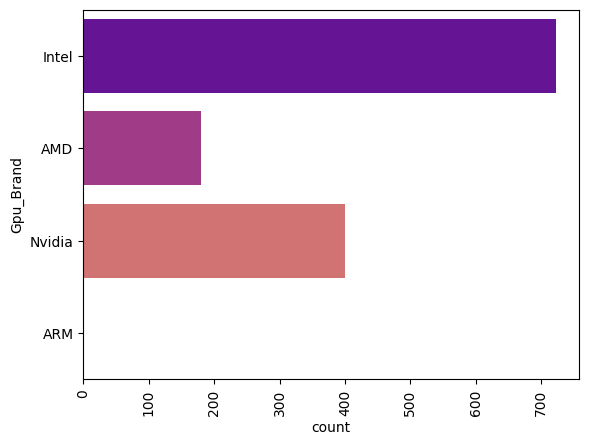

In [75]:
sns.countplot(df['Gpu_Brand'], palette='plasma')
plt.xticks(rotation='vertical')

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800')])

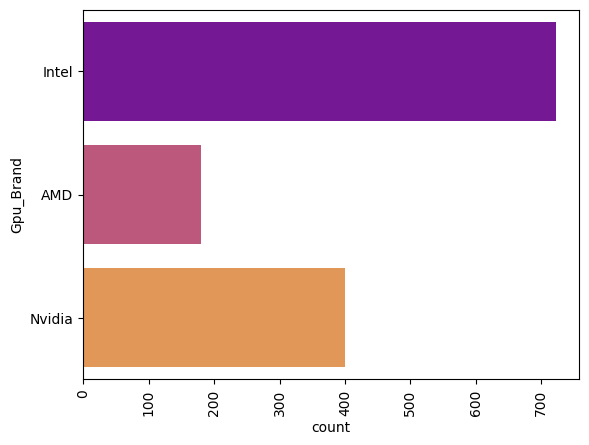

In [76]:
### Removing the "ARM"
df = df[df['Gpu_Brand'] != 'ARM']
sns.countplot(df['Gpu_Brand'], palette='plasma')
plt.xticks(rotation='vertical')

([0, 1, 2], [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Nvidia')])

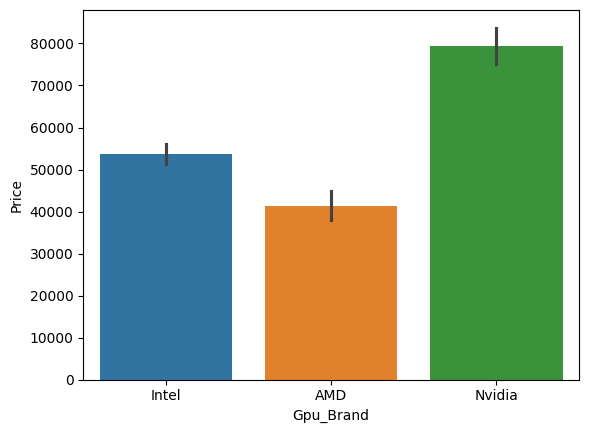

In [77]:
### Compare with df['Price']

sns.barplot(x=df['Gpu_Brand'], y=df['Price'], estimator=np.mean, hue=df['Gpu_Brand'])
plt.xticks(rotation='horizontal')

In [78]:
df = df.drop('Gpu', axis=1)
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,first,Capacity,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,0,1,2560,1600,226.98,Intel Core i5,128 SSD,128,0,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,0,0,1440,900,127.68,Intel Core i5,128 Flash Storage,128,0,0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,0,0,1920,1080,141.21,Intel Core i5,256 SSD,256,0,256,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,0,1,2880,1800,220.53,Intel Core i7,512 SSD,512,0,512,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,0,1,2560,1600,226.98,Intel Core i5,256 SSD,256,0,256,Intel


In [79]:
df = df.drop('ScreenResolution', axis=1)
df.head(5)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,first,Capacity,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,2560,1600,226.98,Intel Core i5,128 SSD,128,0,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,1440,900,127.68,Intel Core i5,128 Flash Storage,128,0,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,1920,1080,141.21,Intel Core i5,256 SSD,256,0,256,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,2880,1800,220.53,Intel Core i7,512 SSD,512,0,512,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,2560,1600,226.98,Intel Core i5,256 SSD,256,0,256,Intel


In [80]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [81]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

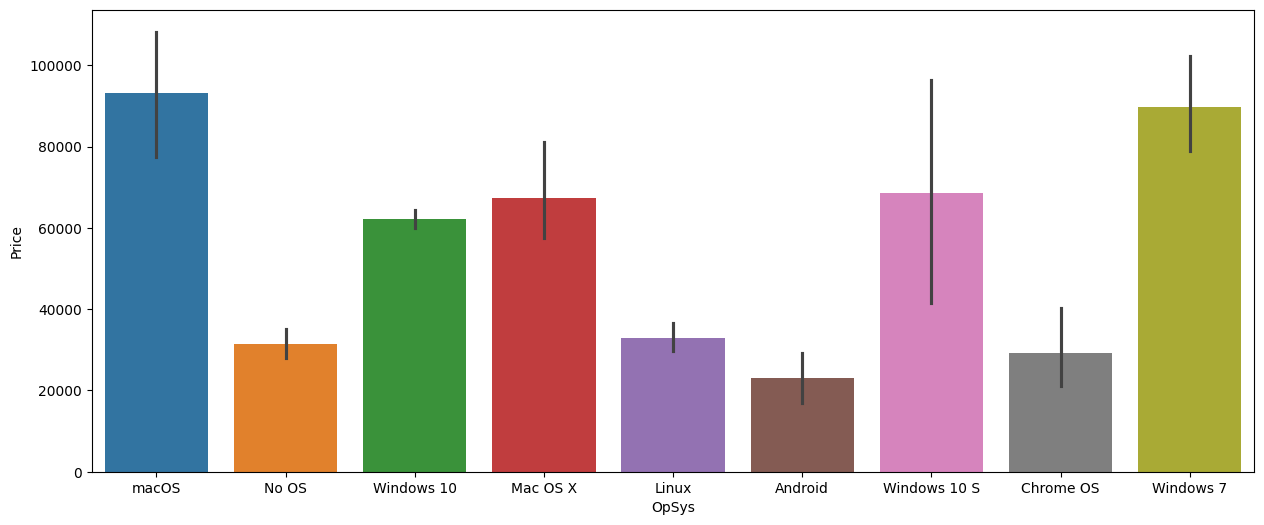

In [82]:
## Compare 'OpSys' and 'Price'
plt.figure(figsize=(15, 6))
sns.barplot(x=df['OpSys'], y=df['Price'], hue=df['OpSys'], estimator=np.mean)
plt.xticks(rotation='horizontal')

In [83]:
def set_category(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'Mac OS X' or text == 'macOS':
        return 'Mac'
    else:
        return 'Other'

df['OpSys'] = df['OpSys'].map(set_category)
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,CPU_name,first,Capacity,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,13.3,8,Mac,1.37,71378.6832,0,1,2560,1600,226.98,Intel Core i5,128 SSD,128,0,128,Intel
1,Apple,Ultrabook,13.3,8,Mac,1.34,47895.5232,0,0,1440,900,127.68,Intel Core i5,128 Flash Storage,128,0,0,Intel
2,HP,Notebook,15.6,8,Other,1.86,30636.0000,0,0,1920,1080,141.21,Intel Core i5,256 SSD,256,0,256,Intel
3,Apple,Ultrabook,15.4,16,Mac,1.83,135195.3360,0,1,2880,1800,220.53,Intel Core i7,512 SSD,512,0,512,AMD
4,Apple,Ultrabook,13.3,8,Mac,1.37,96095.8080,0,1,2560,1600,226.98,Intel Core i5,256 SSD,256,0,256,Intel


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

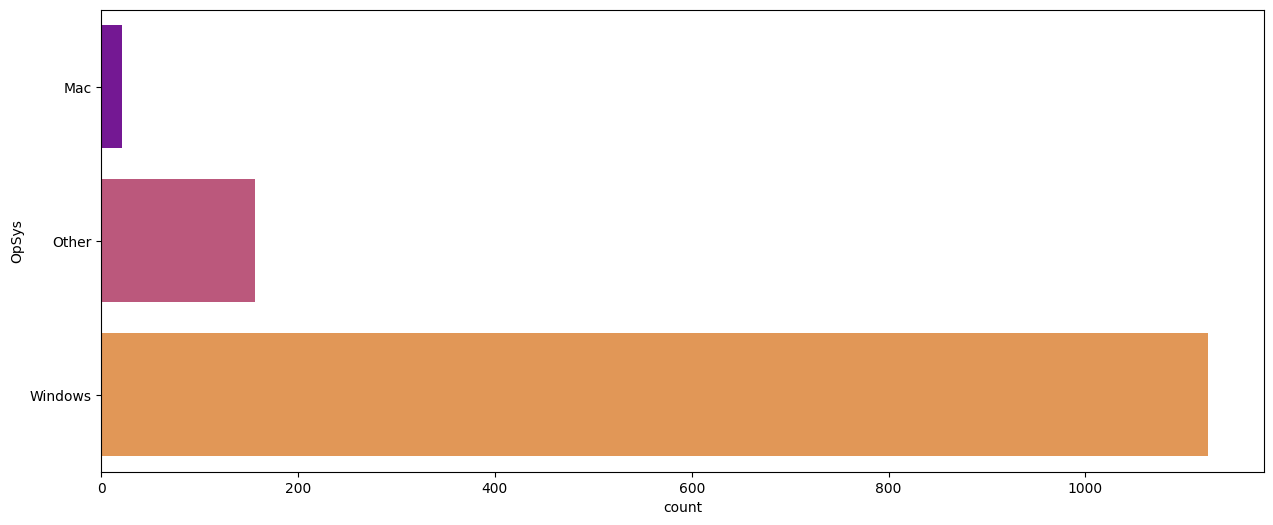

In [84]:
plt.figure(figsize=(15, 6))
sns.countplot(df['OpSys'], palette='plasma')
plt.xticks(rotation='horizontal')

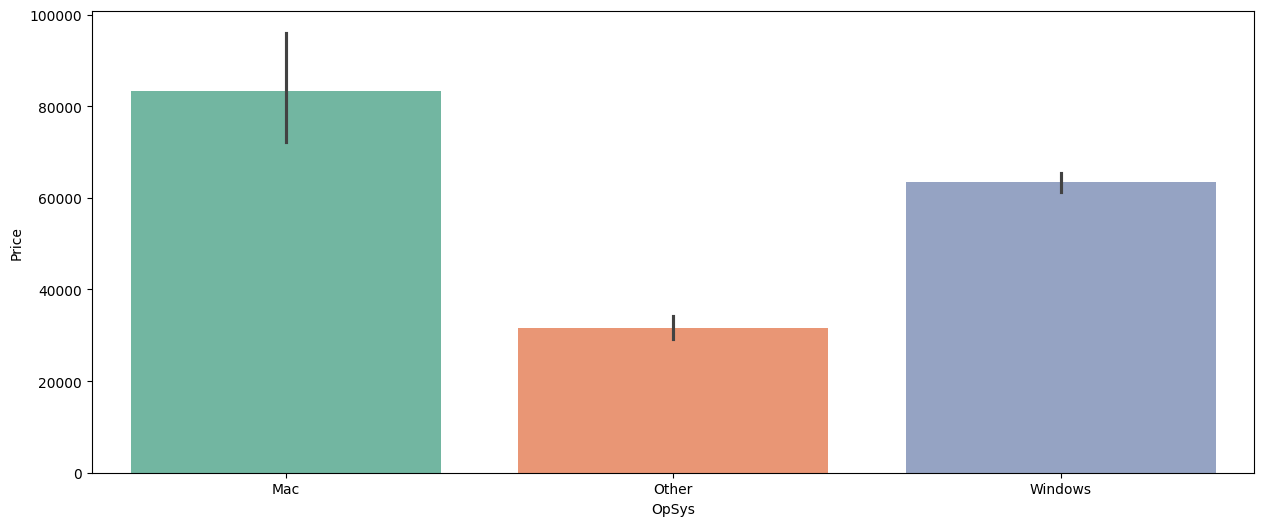

In [85]:
### Compare 'OpSys' with 'Price'
plt.figure(figsize=(15, 6))
sns.barplot(x='OpSys', y='Price', data=df, palette='Set2', estimator=np.mean)
plt.xticks(rotation='horizontal')
plt.show()


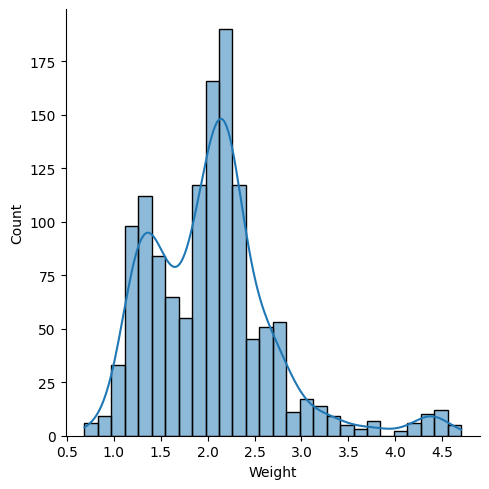

In [86]:
## Weight analysis
sns.displot(df['Weight'], kde=True)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0')])

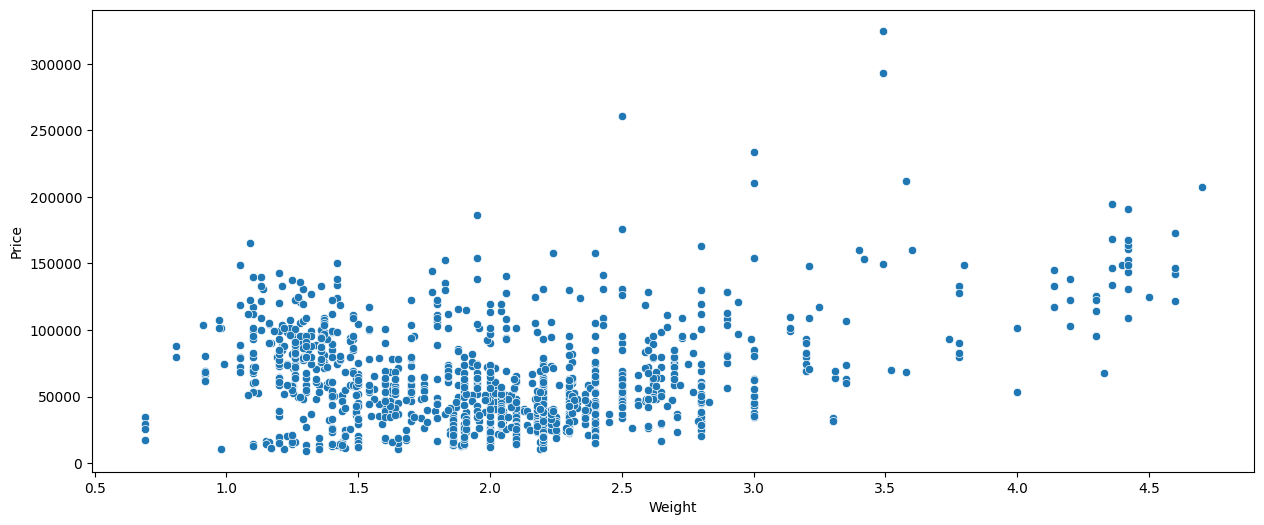

In [87]:
### Using ScatterPlot that perform data between 'Weight' and 'Price'

plt.figure(figsize=(15, 6))
sns.scatterplot(x=df['Weight'], y=df['Price'])
plt.xticks(rotation='horizontal')

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000')])

<Figure size 1500x600 with 0 Axes>

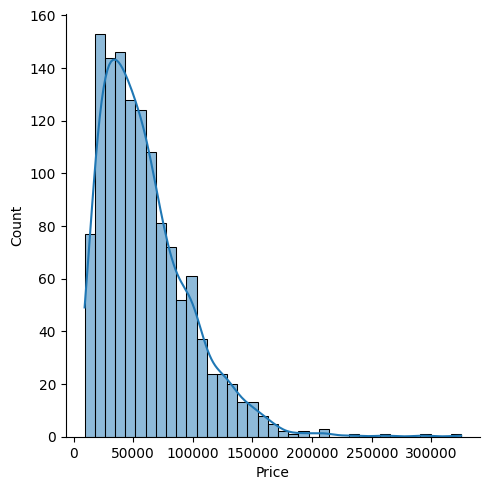

In [88]:
## Price Analysis
plt.figure(figsize=(15, 6))
sns.displot(df['Price'], kde=True)
plt.xticks(rotation='horizontal')

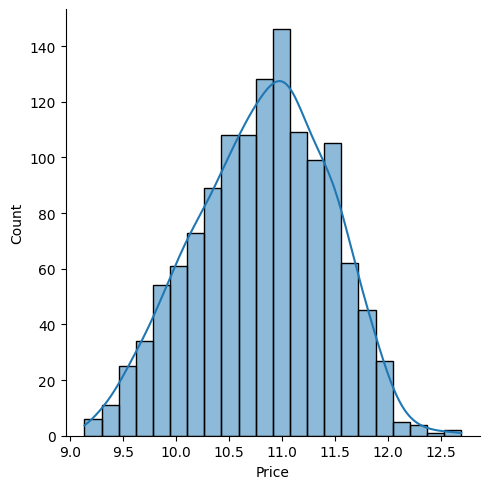

In [89]:
sns.displot(np.log(df['Price']), kde=True)

In [90]:
### Correlation with 'Price'
df.select_dtypes(include='number').corr()['Price']

Inches         0.067329
Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
X_res          0.557369
Y_res          0.554591
PPI            0.475387
Capacity       0.366329
HDD            0.352893
SSD            0.385187
Name: Price, dtype: float64

<Axes: >

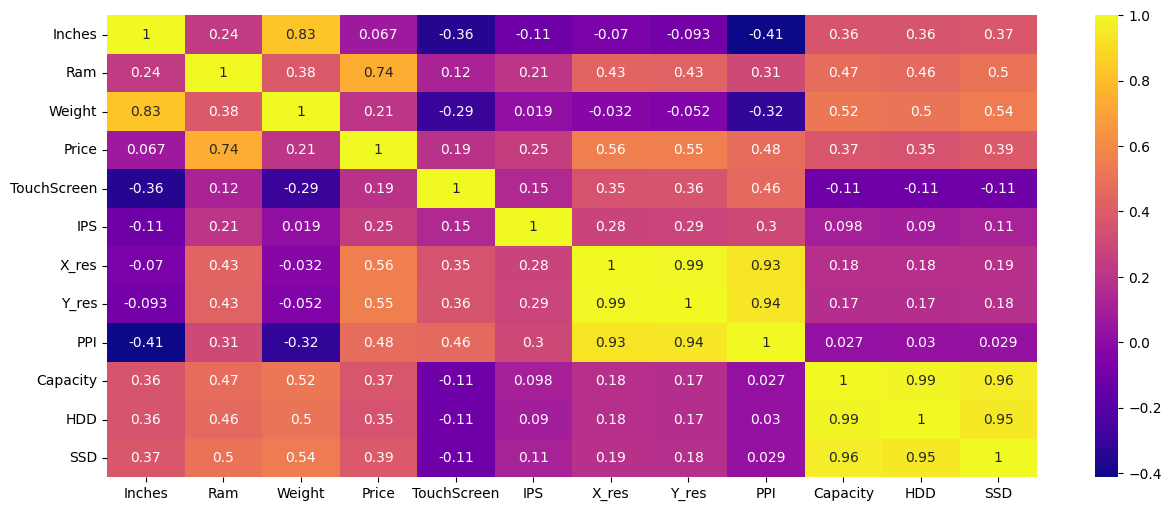

In [91]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='plasma')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Inches       1302 non-null   float64
 3   Ram          1302 non-null   int32  
 4   OpSys        1302 non-null   object 
 5   Weight       1302 non-null   float32
 6   Price        1302 non-null   float64
 7   TouchScreen  1302 non-null   int64  
 8   IPS          1302 non-null   int64  
 9   X_res        1302 non-null   int32  
 10  Y_res        1302 non-null   int32  
 11  PPI          1302 non-null   float64
 12  CPU_name     1302 non-null   object 
 13  first        1302 non-null   object 
 14  Capacity     1302 non-null   int64  
 15  HDD          1302 non-null   int64  
 16  SSD          1302 non-null   int64  
 17  Gpu_Brand    1302 non-null   object 
dtypes: float32(1), float64(3), int32(3), int64(5), object

In [93]:
df[['Company', 'TypeName', 'CPU_name']]

,Company,TypeName,CPU_name
0,Apple,Ultrabook,Intel Core i5
1,Apple,Ultrabook,Intel Core i5
2,HP,Notebook,Intel Core i5
3,Apple,Ultrabook,Intel Core i7
4,Apple,Ultrabook,Intel Core i5
...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7
1300,Lenovo,Notebook,Other Intel Processor
1301,HP,Notebook,Intel Core i7


In [94]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [95]:
df['CPU_name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

In [96]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [97]:
df['OpSys'].unique()

array(['Mac', 'Other', 'Windows'], dtype=object)

In [98]:
df['Gpu_Brand'].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

In [99]:
df = df.drop('first', axis=1)

In [100]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

encoded = ohe.fit_transform(df[['TypeName', 'CPU_name', 'Company', 'Gpu_Brand', 'OpSys']])

### To change is DataFrame
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['TypeName', 'CPU_name', 'Company', 'Gpu_Brand', 'OpSys']))


### Concatenate 'df' and 'encoded_df'
df = pd.concat([df, encoded_df], axis=1)

df = df.drop(['TypeName', 'CPU_name', 'Company', 'Gpu_Brand', 'OpSys'], axis=1)

print(df.head())

   Inches   Ram  Weight        Price  TouchScreen  IPS   X_res   Y_res  \
0    13.3   8.0    1.37   71378.6832          0.0  1.0  2560.0  1600.0   
1    13.3   8.0    1.34   47895.5232          0.0  0.0  1440.0   900.0   
2    15.6   8.0    1.86   30636.0000          0.0  0.0  1920.0  1080.0   
3    15.4  16.0    1.83  135195.3360          0.0  1.0  2880.0  1800.0   
4    13.3   8.0    1.37   96095.8080          0.0  1.0  2560.0  1600.0   

      PPI  Capacity  ...  Company_Samsung  Company_Toshiba  Company_Vero  \
0  226.98     128.0  ...              0.0              0.0           0.0   
1  127.68     128.0  ...              0.0              0.0           0.0   
2  141.21     256.0  ...              0.0              0.0           0.0   
3  220.53     512.0  ...              0.0              0.0           0.0   
4  226.98     256.0  ...              0.0              0.0           0.0   

   Company_Xiaomi  Gpu_Brand_AMD  Gpu_Brand_Intel  Gpu_Brand_Nvidia  \
0             0.0          

In [101]:
df.head()

,Inches,Ram,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,Capacity,...,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Gpu_Brand_AMD,Gpu_Brand_Intel,Gpu_Brand_Nvidia,OpSys_Mac,OpSys_Other,OpSys_Windows
0,13.3,8.0,1.37,71378.6832,0.0,1.0,2560.0,1600.0,226.98,128.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,13.3,8.0,1.34,47895.5232,0.0,0.0,1440.0,900.0,127.68,128.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,15.6,8.0,1.86,30636.0000,0.0,0.0,1920.0,1080.0,141.21,256.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,15.4,16.0,1.83,135195.3360,0.0,1.0,2880.0,1800.0,220.53,512.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,13.3,8.0,1.37,96095.8080,0.0,1.0,2560.0,1600.0,226.98,256.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1191
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Inches                          1302 non-null   float64
 1   Ram                             1302 non-null   float64
 2   Weight                          1302 non-null   float32
 3   Price                           1302 non-null   float64
 4   TouchScreen                     1302 non-null   float64
 5   IPS                             1302 non-null   float64
 6   X_res                           1302 non-null   float64
 7   Y_res                           1302 non-null   float64
 8   PPI                             1302 non-null   float64
 9   Capacity                        1302 non-null   float64
 10  HDD                             1302 non-null   float64
 11  SSD                             1302 non-null   float64
 12  TypeName_2 in 1 Convertible     1302 no

In [103]:
df.head(5)

,Inches,Ram,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI,Capacity,...,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Gpu_Brand_AMD,Gpu_Brand_Intel,Gpu_Brand_Nvidia,OpSys_Mac,OpSys_Other,OpSys_Windows
0,13.3,8.0,1.37,71378.6832,0.0,1.0,2560.0,1600.0,226.98,128.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,13.3,8.0,1.34,47895.5232,0.0,0.0,1440.0,900.0,127.68,128.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,15.6,8.0,1.86,30636.0000,0.0,0.0,1920.0,1080.0,141.21,256.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,15.4,16.0,1.83,135195.3360,0.0,1.0,2880.0,1800.0,220.53,512.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,13.3,8.0,1.37,96095.8080,0.0,1.0,2560.0,1600.0,226.98,256.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [104]:
X = df.drop('Price', axis=1)
y = df['Price']

In [105]:
X.shape

(1303, 47)

In [106]:
y.shape

(1303,)

In [107]:
data = X.copy()
data['Price'] = y

data = data.dropna(subset=['Price'])

X = data.drop('Price', axis=1)
y = data['Price']

In [108]:
X.isnull().sum()

Inches                            0
Ram                               0
Weight                            0
TouchScreen                       0
IPS                               0
X_res                             0
Y_res                             0
PPI                               0
Capacity                          0
HDD                               0
SSD                               0
TypeName_2 in 1 Convertible       1
TypeName_Gaming                   1
TypeName_Netbook                  1
TypeName_Notebook                 1
TypeName_Ultrabook                1
TypeName_Workstation              1
CPU_name_AMD Processor            1
CPU_name_Intel Core i3            1
CPU_name_Intel Core i5            1
CPU_name_Intel Core i7            1
CPU_name_Other Intel Processor    1
Company_Acer                      1
Company_Apple                     1
Company_Asus                      1
Company_Chuwi                     1
Company_Dell                      1
Company_Fujitsu             

In [109]:
y.isnull().sum()

0

In [110]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
X_train.shape

(1041, 47)

In [112]:
y_train.shape

(1041,)

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041 entries, 147 to 1126
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Inches                          1041 non-null   float64
 1   Ram                             1041 non-null   float64
 2   Weight                          1041 non-null   float32
 3   TouchScreen                     1041 non-null   float64
 4   IPS                             1041 non-null   float64
 5   X_res                           1041 non-null   float64
 6   Y_res                           1041 non-null   float64
 7   PPI                             1041 non-null   float64
 8   Capacity                        1041 non-null   float64
 9   HDD                             1041 non-null   float64
 10  SSD                             1041 non-null   float64
 11  TypeName_2 in 1 Convertible     1040 non-null   float64
 12  TypeName_Gaming                 1040 

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [115]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [117]:
## Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [118]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor(),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 18524.4511
- Mean Absolute Error: 13152.2158
- R2 Score: 0.7505
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 20138.7619
- Mean Absolute Error: 14396.0095
- R2 Score: 0.7161


Lasso
Model performance for Training set
- Root Mean Squared Error: 18524.5527
- Mean Absolute Error: 13150.1202
- R2 Score: 0.7505
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 20138.4807
- Mean Absolute Error: 14394.5014
- R2 Score: 0.7161


Ridge
Model performance for Training set
- Root Mean Squared Error: 18526.2852
- Mean Absolute Error: 13147.1777
- R2 Score: 0.7505
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 20149.1321
- Mean Absolute Error: 14378.6284
- R2 Score: 0.7158


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 17223.7400
- Mean Absolute Erro

In [119]:
# Initialize random parameters for Hyperparameter tuning
lr_params = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "positive": [True, False]
}

lasso_params = {"alpha": [0.001, 0.01, 0.1, 1, 10],
                "max_iter": [1000, 2000, 3000]}

ridge_params = {"alpha": [0.1, 1.0, 10.0, 20.0],
                "solver": ["auto", "svd", "cholesky", "saga"]}

knn_params = {"n_neighbors": [3, 5, 7, 9, 11],
              "weights": ["uniform", "distance"],
              "algorithm": ["auto", "ball_tree", "kd_tree"]}

dt_params = {"max_depth": [5, 10, 15, 20, None],
             "min_samples_split": [2, 5, 10],
             "min_samples_leaf": [1, 2, 4]}

rf_params = {"n_estimators": [100, 200, 500, 1000],
             "max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20]}

ada_params = {"n_estimators": [50, 100, 200],
              "learning_rate": [0.01, 0.1, 0.5, 1.0],
              "loss": ["linear", "square", "exponential"]}

gb_params = {"n_estimators": [100, 200, 300],
             "learning_rate": [0.01, 0.1, 0.2],
             "max_depth": [3, 5, 8, 10],
             "subsample": [0.6, 0.8, 1.0]}


In [120]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("Linear Regression", LinearRegression(), lr_params),
    ("Lasso", Lasso(), lasso_params),
    ("Ridge", Ridge(), ridge_params),
    ("K-Neighbors Regressor", KNeighborsRegressor(), knn_params),
    ("Decision Tree", DecisionTreeRegressor(), dt_params),
    ("Random Forest", RandomForestRegressor(), rf_params),
    ("AdaBoost", AdaBoostRegressor(), ada_params),
    ("Gradient Boosting", GradientBoostingRegressor(), gb_params),
]

In [121]:
## Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for Linear Regression -------------------
{'positive': True, 'fit_intercept': True, 'copy_X': True}
---------------- Best Params for Lasso -------------------
{'max_iter': 1000, 'alpha': 10}
---------------- Best Params for Ridge -------------------
{'solver': 'saga', 'alpha': 1.0}
---------------- Best Params for K-Neighbors Regressor -------------------
{'weights': 'distance', 'n_neighbors': 7, 'algorithm': 'kd_tree'}
---------------- Best Params for Decision Tree -------

In [122]:
# Models retraining with best parameters
models = {
    "Linear Regression": LinearRegression(
        positive=True,
        fit_intercept=False,
        copy_X=True
    ),
    "Lasso Regression": Lasso(
        alpha=1,
        max_iter=1000
    ),
    "Ridge Regression": Ridge(
        solver='saga',
        alpha=10.0
    ),
    "K-Neighbors Regressor": KNeighborsRegressor(
        weights='distance',
        n_neighbors=7,
        algorithm='auto'
    ),
    "Decision Tree Regressor": DecisionTreeRegressor(
        min_samples_split=10,
        min_samples_leaf=4,
        max_depth=20
    ),
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=200,
        min_samples_split=2,
        max_features=8,
        max_depth=15,
        n_jobs=-1
    ),
    "AdaBoost Regressor": AdaBoostRegressor(
        n_estimators=100,
        loss='exponential',
        learning_rate=0.1
    ),
    "Gradient Boosting Regressor": GradientBoostingRegressor(
        subsample=0.8,
        n_estimators=200,
        max_depth=3,
        learning_rate=0.1
    ),
}

# Train and evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print results
    print(f"=============== {name} ===============")
    print('Model performance for Training set')
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print('----------------------------------')

    print('Model performance for Test set')
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    print("="*50)
    print("\n")


=============== Linear Regression ===============
Model performance for Training set
- Root Mean Squared Error: 63048.1551
- Mean Absolute Error: 60295.3735
- R2 Score: -1.8900
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 63606.3545
- Mean Absolute Error: 60369.3636
- R2 Score: -1.8316


=============== Lasso Regression ===============
Model performance for Training set
- Root Mean Squared Error: 18524.5527
- Mean Absolute Error: 13150.1202
- R2 Score: 0.7505
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 20138.4807
- Mean Absolute Error: 14394.5014
- R2 Score: 0.7161


=============== Ridge Regression ===============
Model performance for Training set
- Root Mean Squared Error: 18557.6412
- Mean Absolute Error: 13150.3004
- R2 Score: 0.7496
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 20197.9324
- Mean Absolute Error: 14352.0557
- R2 Score: 0.71